# Material dividido em três partes A, B e C.

- Bruna Faria, PhD em Computação, Ciência de Dados e Engenharia.

## A - Tutorial para conversão de imagens para arquivos .csv

###### A matriz imagem possui N-dimensional arrays obtidos após a conversão da imagem. 

Dessa forma a matriz retornada pelo comando **shape** define a matriz (n,n,d) sendo d a dimensão (ou a quantidades de canais) presentes na imagem.

- se d = 1: a imagem está em preto e branco ou escala de cinza, ou seja, possui apenas um canal.
- se d = 3: a imagem é colorida ou RGB. Por exemplo: cada canal é uma matriz nxn onde cada entrada representa os valores para vermelho, verde e azul.

Neste exemplo a imagem é colorida (d=3).

Obs.: Podemos salvar apenas arquivos com matrizes 1D ou 2D, por isso imagens coloridas precisam ser convertidas.

#### 1) Extraindo a matriz a partir de um arquivo de imagem (jpg):

In [1]:
# Importando módulos:
import matplotlib.image as img
from PIL import Image
import numpy as np
  
# maneira 1:
image = Image.open('gato.jpg') # carregar a imagem
matriz = np.asarray(image) # converte a image para um array
print(matriz.shape)

# maneira 2:
matriz = img.imread('gato.jpg') # carregar a imagem
print(matriz.shape)

(266, 250, 3)
(266, 250, 3)


#### 2) Salvando a matriz da imagem como arquivo csv:

In [2]:
# Importando módulos:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from keras.preprocessing.image import array_to_img

# Ler a imagem
image_mat = img.imread('gato.jpg') # escreve a imagem como matriz
print("Dimensões da imagem:", image_mat.shape)

# É necessario criar uma regra para verificar a dimensão da imagem:

if (image_mat.shape[2] == 3): # se colorida:
    matriz_image = image_mat.reshape(image_mat.shape[0],-1) # reshape de uma matriz 3d para 2d
    print("Nova dimensão (2d):", matriz_image.shape)

# se cinza (d=1) a matriz_image não precisa ser redimensionada!
      
# Salvando a matriz como arquivo .csv:
np.savetxt('gato.csv', matriz_image)

Dimensões da imagem: (266, 250, 3)
Nova dimensão (2d): (266, 750)


#### 3) Comparando as imagens a partir dos dois arquivos: 

Imagem carregada a partir do arquivo csv: (266, 250, 3)
Imagem original:


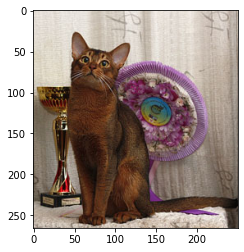

Imagem gerada a partir do arquivo csv:


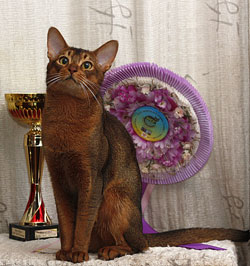

In [3]:
# Carregar o arquivo:
matriz_2D = np.loadtxt('gato.csv')
  
# transpor para uma matriz 3d:
image = matriz_2D.reshape(matriz_2D.shape[0], matriz_2D.shape[1] // image_mat.shape[2], image_mat.shape[2])
print("Imagem carregada a partir do arquivo csv:", image.shape)

# displaying as imagens:
print('Imagem original:')
plt.imshow(image_mat) # display a imagem original
plt.show()

# É interessante mostrar a imagem tanto original quanto a convertida a partir do arquivo csv:
fromcsv = array_to_img(image)
print('Imagem gerada a partir do arquivo csv:')
fromcsv

## B - Convertendo várias imagens para um único arquivo csv:

In [4]:
# Funções são importantes para facilitar nosso trabalho:

import matplotlib.image as img

# Função para ler a imagem. Retorna a matriz da imagem.
def read_image(path):
    matrix = img.imread(path)

    if (matrix.shape[2] == 3): # se colorida:
        img2d = matrix.reshape(matrix.shape[0],-1) # reshape de uma matriz 3d para 2d
    else: img2d = matrix
        
    return img2d
    
# Função para encontrar e listar os arquivos do diretório. Retorna a lista dos caminhos.
import os
def file_list(DIR, format='.jpg'):
    fileList = []
    for root, dirs, files in os.walk(DIR, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)   
    return fileList

In [8]:
# Caminho dos diretórios com as imagens:

# Exemplo: DIR = 'D:\path\image2csv\target'

DIR1 = 'cat'

In [9]:
# Lista dos caminhos de cada imagem:

files_lista = file_list(DIR1)

In [10]:
# Extrai a matriz de cada imagem listada pela função aplicada na celula anterior.

imgmx = []

for i,path in enumerate(files_lista):
    img1 = read_image(path)
    imgmx.append(img1)
    
print(len(imgmx))

10


In [11]:
# Escreve o arquivo csv contendo todas as matrizes. Cada linha = 1 imagem.

import pandas as pd

df = pd.DataFrame(imgmx, columns=['matriz'])
df.to_csv('imagens.csv', index=False)

D:\Bruna\anaconda3\lib\site-packages\pandas\core\internals\construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [12]:
# Ler e verificar o arquivo.

file = pd.read_csv('imagens.csv')
file

,matriz
0,[[ 43 32 38 ... 22 11 17]\n [ 42 31 37 ...
1,[[214 195 165 ... 173 142 121]\n [214 193 164 ...
2,[[129 113 97 ... 136 124 100]\n [128 112 96 ...
3,[[207 155 95 ... 169 158 126]\n [207 155 95 ...
4,[[ 46 51 45 ... 8 10 9]\n [ 46 51 45 ...
5,[[235 250 229 ... 110 70 58]\n [232 247 226 ...
6,[[67 24 34 ... 97 33 47]\n [67 24 34 ... 97 31...
7,[[ 59 48 44 ... 17 17 17]\n [ 62 51 47 ...
8,[[118 115 96 ... 141 135 119]\n [118 115 96 ...
9,[[ 69 66 59 ... 70 72 71]\n [ 73 70 61 ...


## C - Tutorial para escrever um arquivo .csv único contendo o caminho das imagens

- Quando tratamos de grandes volumes de dados de imagem é conveniente termos as imagens listadas dentro de um arquivo txt ou csv.
- A partir desse arquivo podemos dividir em train, test e validation datasets de maneira mais fácil.
- É importante ter em mente que funções são facilitadoras e nos ajudam muito nesse tipo de implementação


> Nesse exemplo vou criar um arquivo csv com o caminho de cada foto presente nas pastas cat e dog.

In [13]:
# Função para encontrar e listar os arquivos do diretório. Retorna a lista dos caminhos e labels.

import os
def file_list(DIR, label, format='.jpg'):
    fileList = []
    labels = []
    for root, dirs, files in os.walk(DIR, topdown=False):
        for name in files:
            if name.endswith(format):
                fullName = os.path.join(root, name)
                fileList.append(fullName)   
                labels.append(label)
    return fileList, labels

In [14]:
# Caminho dos diretórios com as imagens

DIR1 = 'cat'
DIR2 = 'dog'

In [15]:
# Obtem a lista do caminho e labels dos arquivos
import pandas as pd

files1, labels1 = file_list(DIR1, label='gato')
files2, labels2 = file_list(DIR2, label='cachorro')

allfiles = files1+files2
labels = labels1+labels2

# Salvar o arquivo csv contendo o caminho das imagens

df = pd.DataFrame(zip(allfiles, labels), columns=['filepath', 'label'])
df.to_csv('pathfiles.csv', index=False)

In [16]:
# Ler o arquivo csv para conferir:

paths = pd.read_csv('pathfiles.csv')
paths.head(11)

,filepath,label
0,cat\Abyssinian_219.jpg,gato
1,cat\Abyssinian_220.jpg,gato
2,cat\Abyssinian_221.jpg,gato
3,cat\Abyssinian_223.jpg,gato
4,cat\Abyssinian_224.jpg,gato
5,cat\Abyssinian_225.jpg,gato
6,cat\Abyssinian_226.jpg,gato
7,cat\Abyssinian_228.jpg,gato
8,cat\Abyssinian_230.jpg,gato
9,cat\Abyssinian_232.jpg,gato


## Extra - Como utilizar os arquivos csv como inputs para ML/DL

#### 1) Usando o arquivo que contém o caminho das imagens:

- Basta obter normalmente o dataset separando X e y;
- Você também pode aplicar o train_test_split a X e y normalmente;
- X, y, X_train/test, y_train/test irão conter o caminho das imagens como input para serem usados.

Obs.: Você precisara de uma função simples para ler a imagem a partir do caminho fornecido pelo arquivo csv.

In [17]:
# Separar normalmente o dataset em X, y e então fazer o split para ter o train e test

from sklearn.model_selection import train_test_split
random=123

X = paths.filepath
y = paths.label
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=random)

In [18]:
print('X inicial:', X.shape, '\nX train', x_train.shape, '\nX test', x_test.shape)
print('Y inicial:', y.shape, '\nY train', y_train.shape, '\nY test', y_test.shape)

X inicial: (20,) 
X train (15,) 
X test (5,)
Y inicial: (20,) 
Y train (15,) 
Y test (5,)


In [19]:
x_train.head(5)

7          cat\Abyssinian_228.jpg
19     dog\american_bulldog_9.jpg
12    dog\american_bulldog_12.jpg
0          cat\Abyssinian_219.jpg
15     dog\american_bulldog_5.jpg
Name: filepath, dtype: object

In [20]:
y_train.head(5)

7         gato
19    cachorro
12    cachorro
0         gato
15    cachorro
Name: label, dtype: object

In [21]:
x_train[1]

'cat\\Abyssinian_220.jpg'

> Agora é só usar normalmente o arquivo. Lembrando que é preciso ter uma função simples para ler a imagem a partir do caminho fornecido pelo arquivo csv.

In [ ]:
def read_csv(path):
    ...
    return ...

for i in x_train.shape[0]:
    img = read_csv(x_train[i])
    # Aqui vc implementa com códigos e funções para prosseguir com a análise…

#### 2) Usando o arquivo que contém a matriz das imagens:

- Basta seguir o mesmo procedimento descrito na instrucao anterior.